# Machine Learning Data Preprocessing

This notebook will guide you through the basic steps to preprocess a machine learning dataset using basic Python and pandas code. We will be using a dataset containing housing prices to demonstrate the preprocessing steps.

## Step 1: Import Necessary Libraries

We will start by importing the necessary libraries.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

## Step 2: Load the Dataset

Next, we will load the dataset using pandas.

In [21]:
# Load the dataset
file_path = 'house_train.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 3: Separate Features and Target Variable

We need to separate the features (input variables) and the target variable (output variable).

In [22]:
# Separate features and target variable
X = data.drop(columns=['SalePrice', 'Id'])
y = data['SalePrice']

## Step 4: Identify Numerical and Categorical Columns

We need to identify which columns are numerical and which are categorical.

In [23]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

Numerical columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Categorical columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'

## Step 5: Handle Missing Values

For simplicity, we will fill missing values in numerical columns with the median value and in categorical columns with the most frequent value.

In [24]:
# Fill missing values in numerical columns with median
for col in numerical_cols:
    X[col].fillna(X[col].median(), inplace=True)

# Fill missing values in categorical columns with the most frequent value
for col in categorical_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)

C:\Users\as250199\AppData\Local\Temp\ipykernel_26224\3287129032.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
C:\Users\as250199\AppData\Local\Temp\ipykernel_26224\3287129032.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

## Step 6: Encode Categorical Variables

We need to convert categorical variables into numerical values using one-hot encoding.

In [25]:
# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_cols)

In [26]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


## Step 7: Split the Data into Training and Test Sets

We will split the dataset into training and test sets to evaluate the performance of our machine learning model.

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (1168, 287)
Test data shape: (292, 287)


With these steps, we have preprocessed our dataset and it's now ready for training a machine learning model.

## Model building 

### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9444673719085074

In [29]:
model.score(X_test, y_test)

-2437580.2012529452

In [30]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

1.683357005092842e+16

1.0
0.7739961999636219


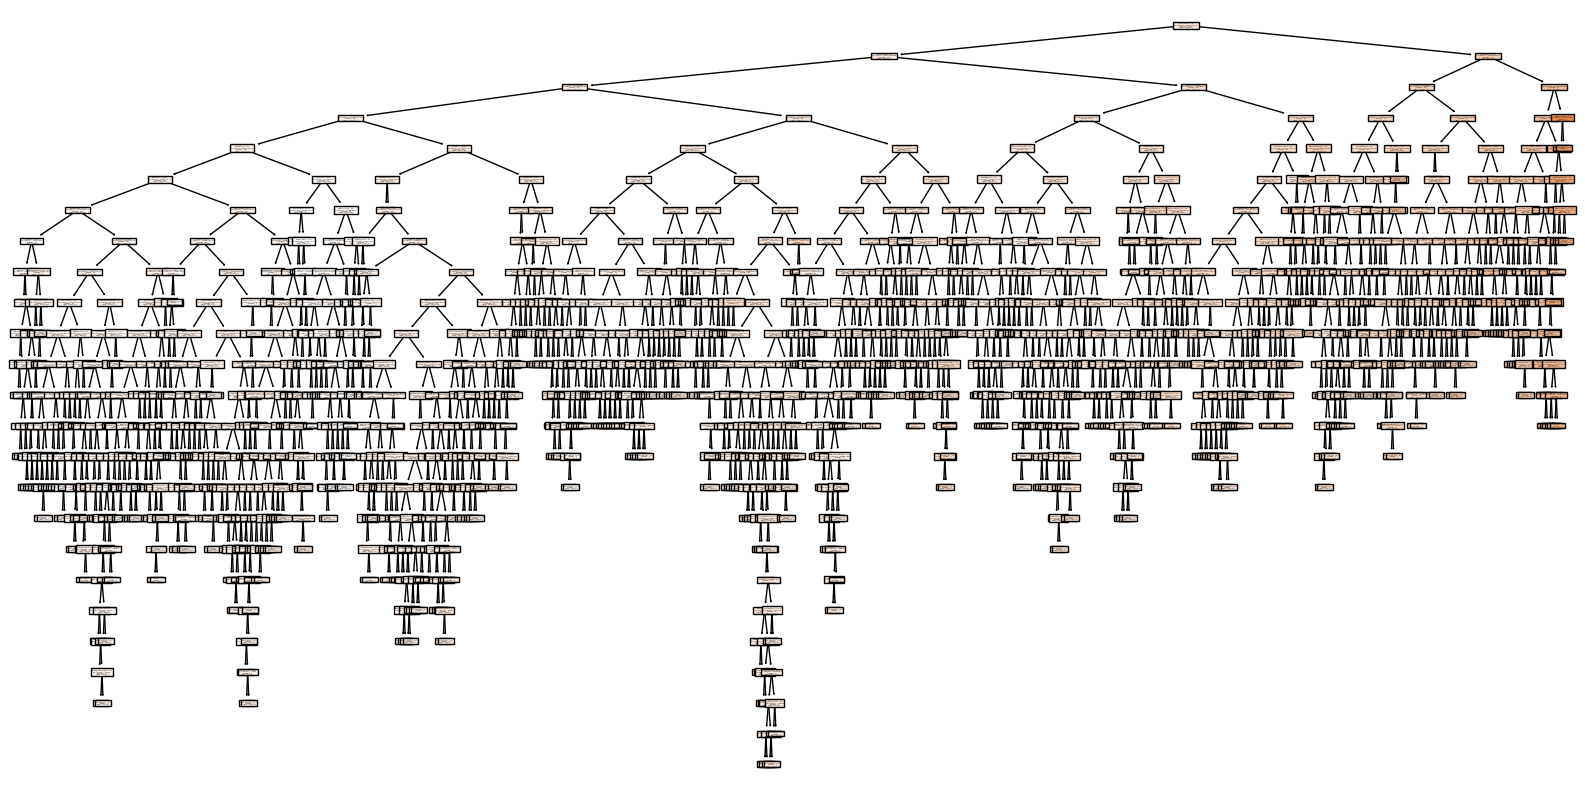

In [37]:
# write code to draw a decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()


0.7441195561260132
0.7411715370431177


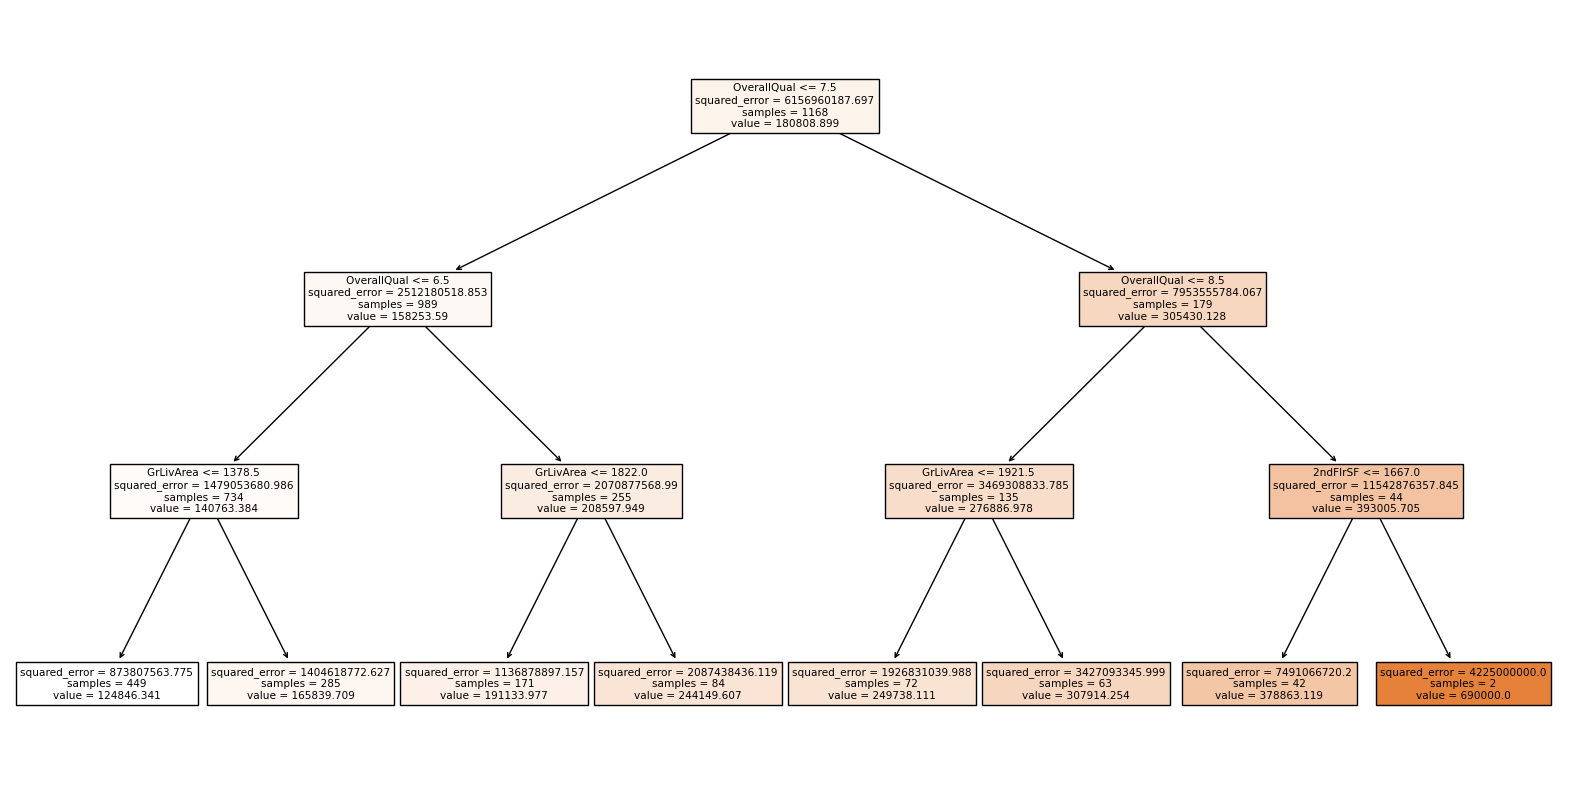

In [38]:
# write code to draw a decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()


0.8480238893464334
0.7709194590226451


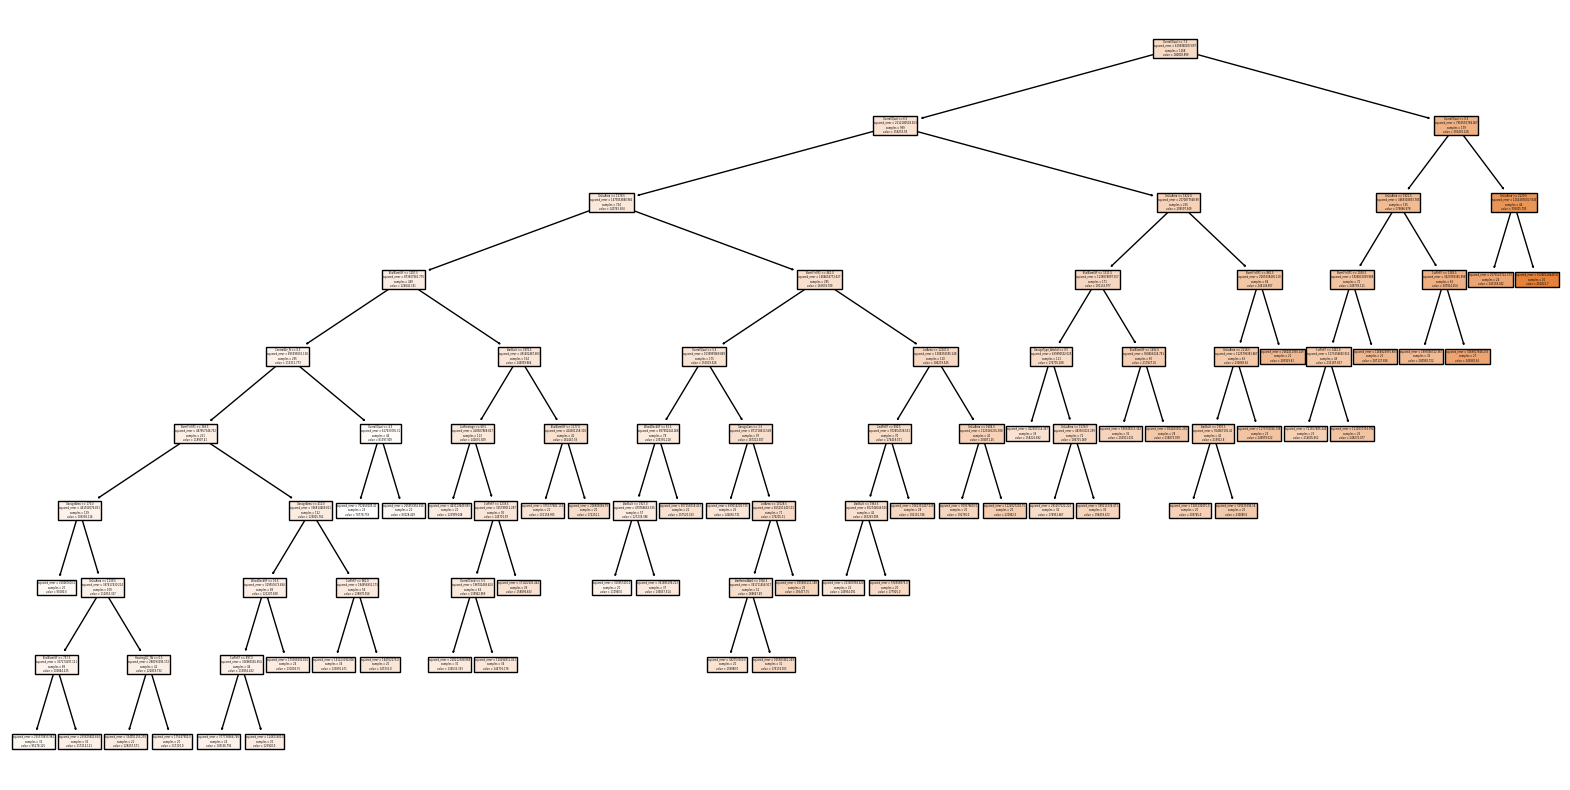

In [40]:
# write code to draw a decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeRegressor(min_samples_leaf=20)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()


## Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
model_rf.score(X_train, y_train)

0.9781590963498449

In [32]:
y_pred = model_rf.predict(X_test)
mean_squared_error(y_test, y_pred)

1143206540.8207502

In [48]:
model_rf = RandomForestRegressor(n_estimators=100,min_samples_leaf=5, random_state=42)
model_rf.fit(X_train, y_train)
print(model.score(X_train, y_train))
model_rf.score(X_test, y_test)

0.8480238893464334


0.8168005330378332

In [16]:
# Use LabelEncoder to convert categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
# Load the dataset
file_path = 'house_train.csv'
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop(columns=['SalePrice', 'Id'])
y = data['SalePrice']

# Fill missing values in numerical columns with median
for col in numerical_cols:
    X[col].fillna(X[col].median(), inplace=True)

label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])
    

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

model_rf = RandomForestRegressor(n_estimators=20, min_samples_leaf=3, random_state=42)
model_rf.fit(X_train, y_train)
print(model_rf.score(X_train, y_train))
model_rf.score(X_test, y_test)

C:\Users\as250199\AppData\Local\Temp\ipykernel_26224\134619657.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].median(), inplace=True)
C:\Users\as250199\AppData\Local\Temp\ipykernel_26224\134619657.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Training data shape: (1168, 79)
Test data shape: (292, 79)
0.9522735848822043


0.8333892328300834